In [1]:
from matplotlib import pyplot as plt
import os
import random

In [2]:
# get list of file names 
cat_loc = 'Dataset/PetImages/Cat/'
dog_loc = 'Dataset/PetImages/Dog/'
_, _, cat_images = next(os.walk(cat_loc))
_, _, dog_images = next(os.walk(dog_loc))


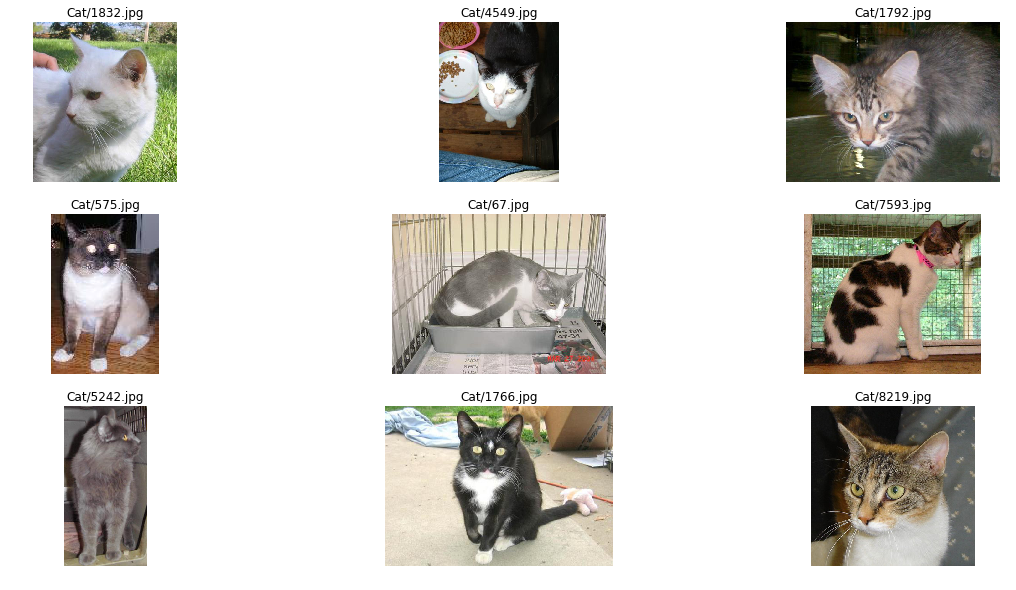

In [3]:
fig, ax = plt.subplots(3,3, figsize=(20,10))

for idx, img in enumerate(random.sample(cat_images, 9)):
    img_read = plt.imread(cat_loc + img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Cat/' + img)
    
plt.show()
    

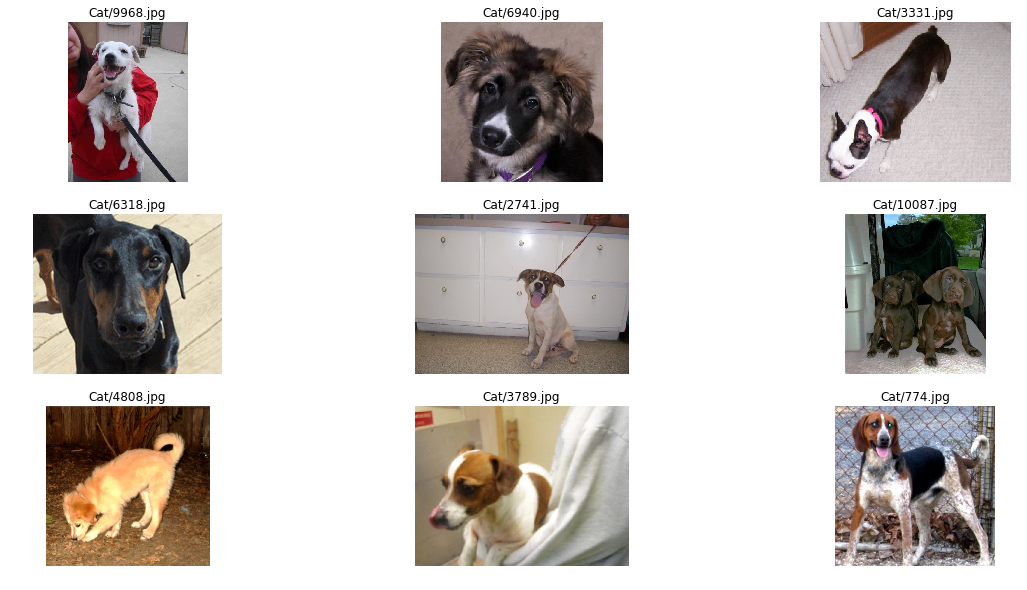

In [4]:
fig, ax = plt.subplots(3,3, figsize=(20,10))

for idx, img in enumerate(random.sample(dog_images, 9)):
    img_read = plt.imread(dog_loc + img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('Cat/' + img)
    
plt.show()

ImageDatGenerator takes in various inputs to create more training data from the dataset we already have. 
This is done through various shifts, flips and rotations. 

In [6]:
from email.errors import InvalidMultipartContentTransferEncodingDefect
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rotation_range = 30, 
                                     width_shift_range = 0.2, 
                                     height_shift_range=0.2, 
                                     zoom_range = 0.2, 
                                     horizontal_flip=True, 
                                     fill_mode = 'nearest')


Using TensorFlow backend.


In [7]:
# INCREASES THE ROBUSTNESS OF OUR MODEL. 
# Each image now has 5 different shifted counterparts

def compare_augmented_images(src: str, image_generator: ImageDataGenerator):
    all_images = []
    fig, ax = plt.subplots(2, 3, figsize = (20,10))
    _, _, images = next(os.walk(src))
    random_img = random.sample(images, 1)[0]
    
    random_img = plt.imread(src + random_img)
    all_images.append(random_img)
    
    
    random_img = random_img.reshape((1, ) + random_img.shape)
    sample_augmented_img = image_generator.flow(random_img)

    for _ in range(5):
        augmented_img = sample_augmented_img.next()
        for img in augmented_img: 
            all_images.append(img.astype('uint8'))
            
    for idx, img in enumerate(all_images):
        ax[int(idx/3), idx % 3].imshow(img)
        ax[int(idx/3), idx % 3].axis('off')
        
        if idx == 0: 
            ax[int(idx/3), idx %3].set_title('Original Image')
        else: 
            ax[int(idx/3), idx % 3].set_title(f'Augmented Image {idx}')

In [8]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dropout, Flatten, Dense

In [ ]:
NUM_SAMPLES = 20000
FILTER_SIZE = 3
NUM_FILTERS = 32
INPUT_SIZE = 32
MAXPOOLING_SIZE = 2
BATCH_SIZE = 16
STEPS_PER_EPOCH = NUM_SAMPLES // BATCH_SIZE

EPOCHS = 10

model = Sequential()


model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                 input_shape = (INPUT_SIZE, INPUT_SIZE, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size = (MAXPOOLING_SIZE, MAXPOOLING_SIZE)))
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                 input_shape = (INPUT_SIZE, INPUT_SIZE, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size = (MAXPOOLING_SIZE, MAXPOOLING_SIZE)))
model.add(Flatten()) # flattens the shape from say (3x3x3) -> 27 
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.5)) # sets a random amount of inputs to 0. To help prevent overfitting. This model will set 50% of the weights to 0 
model.add(Dense(units = 1, activation='sigmoid')) # output layer, using the sigmoid function for its usefulness in binary classification. 


# Adam uses Stochastic Gradient Decent 
# Binary Crossentropy is used because we are solving a binary classifcation problem 
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [11]:
dog_train_loc = 'Dataset/PetImages/Train/Dog/'
cat_train_loc = 'Dataset/PetImages/Train/Cat/'
train_loc = 'Dataset/PetImages/train/'
training_data_generator = ImageDataGenerator(rescale = 1./255)

training_set = training_data_generator.flow_from_directory(
    train_loc, target_size=(INPUT_SIZE, INPUT_SIZE),
            batch_size=BATCH_SIZE, 
            class_mode = 'binary'
)
model.fit_generator(training_set, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, verbose = 1)

Found 19997 images belonging to 2 classes.
Epoch 1/10
1250/1250 [==============================] - 62s 49ms/step - loss: 0.6148 - acc: 0.6525
Epoch 2/10
1250/1250 [==============================] - 79s 63ms/step - loss: 0.5327 - acc: 0.7335
Epoch 3/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.4948 - acc: 0.7601
Epoch 4/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.4642 - acc: 0.7811
Epoch 5/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.4383 - acc: 0.7984
Epoch 6/10
1250/1250 [==============================] - 57s 45ms/step - loss: 0.4147 - acc: 0.8081
Epoch 7/10
1250/1250 [==============================] - 77s 62ms/step - loss: 0.3953 - acc: 0.8195
Epoch 8/10
1250/1250 [==============================] - 94s 75ms/step - loss: 0.3655 - acc: 0.8366
Epoch 9/10
1250/1250 [==============================] - 73s 59ms/step - loss: 0.3406 - acc: 0.8478
Epoch 10/10
1250/1250 [==============================] - 51s 41ms/

This model uses two Convolutional layers, with a 3x3 filter and input size of 128x128. These results are then fed into their respective maxpooling layer, which takes a 2x2 patch of the feature map and calculates a respective maxiumum value. This is done to downsample the feature map and allow for the convolutional layer to recongnize paterns. 

The feature map is then flatted from say a (3x3x3) shape to 27 x 1 shape. This is done because how we are feeding the signals into a dense layer which is a fully activated layer to analyse the data give to it. We then drop a random half of inputs to 0 to prevent overfitting. 

The final Dense layer is the prediction layer, since this is a binary classification problem we will use a sigmoid activation function and 1 output node. 

This model after 10 epochs is able to predict whether an image has a cat or dog with an accuracy of ~85%. 